In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [3]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Logistic Regression Projects\\Project 1 - titanic dataset\\train.csv.xls")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df = df.drop(columns=['PassengerId','PassengerId','Ticket'], axis = 1)

In [9]:
df = df.drop(['Cabin'], axis =1)

In [10]:
df = df.drop(['Name'], axis =1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Target Variable - Survived

In [12]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Survived')

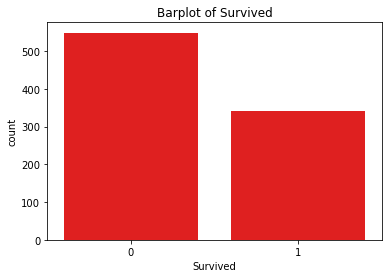

In [13]:
sns.countplot(df.Survived, color='red')
plt.title('Barplot of Survived')

# Pclass

In [14]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Pclass')

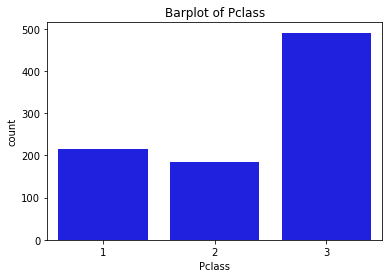

In [15]:
sns.countplot(df.Pclass, color='blue')
plt.title('Barplot of Pclass')

In [16]:
from scipy.stats import chi2_contingency

In [17]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
#Hypothesis Testing
ct_Pclass = pd.crosstab(df.Survived, df.Pclass)
chi2_contingency(ct_Pclass, correction = False)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

# Sex

In [19]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Sex')

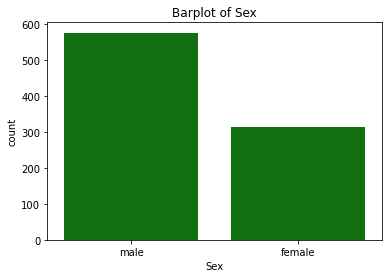

In [20]:
sns.countplot(df.Sex, color='green')
plt.title('Barplot of Sex')

In [21]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
ct_Sex = pd.crosstab(df.Survived, df.Sex)
chi2_contingency(ct_Sex, correction = False)

(263.05057407065567,
 3.711747770113424e-59,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

In [23]:
df['Sex']= le.fit_transform(df['Sex']) 

In [24]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

# Age

In [26]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [27]:
a=df.Age.median()
a

28.0

In [28]:
df.Age.fillna(a,inplace=True)

In [29]:
df.Age.isnull().sum()

0

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Age')

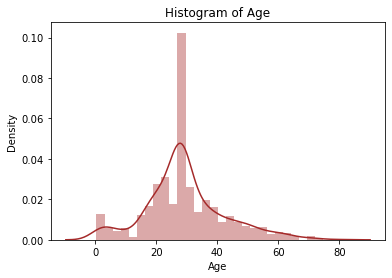

In [30]:
sns.distplot(df.Age, color = 'brown')
plt.title('Histogram of Age')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age')

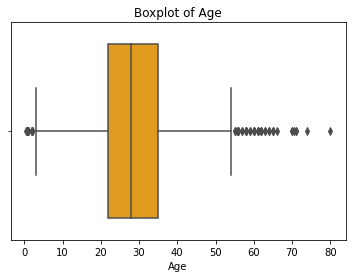

In [31]:
sns.boxplot(df.Age, color = 'orange')
plt.title('Boxplot of Age')

In [32]:
import math
import scipy.stats as stats
from scipy import stats

In [33]:
iqr = stats.iqr(df['Age'])
iqr

13.0

In [34]:
q3=df['Age'].quantile(0.75)
q3

35.0

In [35]:
q1=df['Age'].quantile(0.25)
q1

22.0

In [36]:
upper = q3+(1.5*iqr)
upper

54.5

In [37]:
lower = q1-(1.5*iqr)
lower

2.5

In [38]:
df['Age'] = np.where(df['Age']>upper, upper, df['Age'])

In [39]:
df['Age'] = np.where(df['Age']<lower, lower, df['Age'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age')

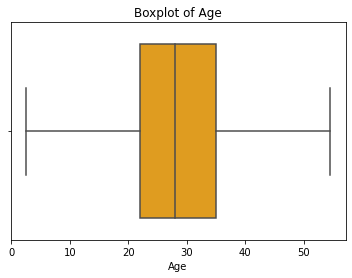

In [40]:
sns.boxplot(df.Age, color = 'orange')
plt.title('Boxplot of Age')

# SibSp

In [41]:
df.SibSp.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of SibSp')

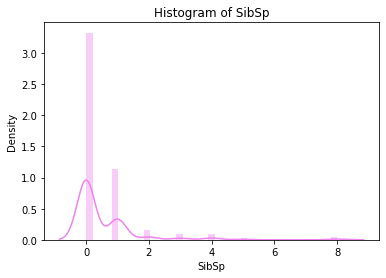

In [42]:
sns.distplot(df.SibSp, color = 'violet')
plt.title('Histogram of SibSp')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of SibSp')

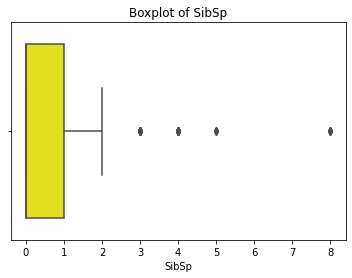

In [43]:
sns.boxplot(df.SibSp, color = 'yellow')
plt.title('Boxplot of SibSp')

In [44]:
iqr = stats.iqr(df['SibSp'])
iqr

1.0

In [45]:
q3=df['SibSp'].quantile(0.75)
q3

1.0

In [46]:
q1=df['SibSp'].quantile(0.25)
q1

0.0

In [47]:
upper = q3+(1.5*iqr)
upper

2.5

In [48]:
lower = q1-(1.5*iqr)
lower

-1.5

In [49]:
df['SibSp'] = np.where(df['SibSp']>upper, upper, df['SibSp'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of SibSp')

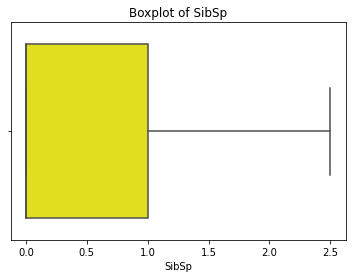

In [50]:
sns.boxplot(df.SibSp, color = 'yellow')
plt.title('Boxplot of SibSp')

In [51]:
df[['SibSp','Survived']].groupby(["SibSp"],as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,SibSp,Survived
1,1.0,0.535885
2,2.0,0.464286
0,0.0,0.345395
3,2.5,0.152174


# Parch

In [52]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Parch')

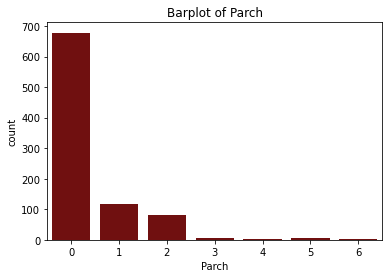

In [53]:
sns.countplot(df.Parch, color = 'maroon')
plt.title('Barplot of Parch')

In [54]:

df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Fare

In [55]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Fare')

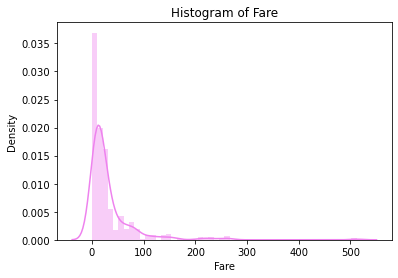

In [56]:
sns.distplot(df.Fare, color = 'violet')
plt.title('Histogram of Fare')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Fare')

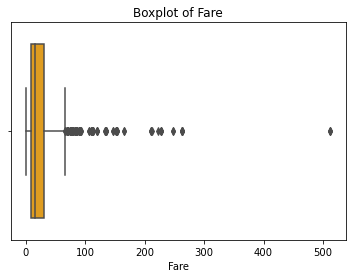

In [57]:
sns.boxplot(df.Fare, color = 'orange')
plt.title('Boxplot of Fare')

In [58]:
iqr = stats.iqr(df['Fare'])
iqr

23.0896

In [59]:
q3=df['Fare'].quantile(0.75)
q3

31.0

In [60]:
q1=df['Fare'].quantile(0.25)
q1

7.9104

In [61]:
upper = q3+(1.5*iqr)
upper

65.6344

In [62]:
lower = q1-(1.5*iqr)
lower

-26.724

In [63]:
df['Fare'] = np.where(df['Fare']>upper, upper, df['Fare'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Fare')

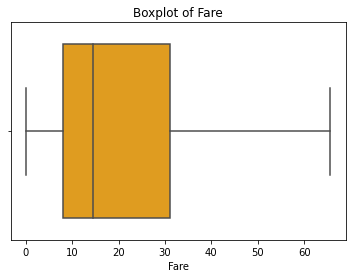

In [64]:
sns.boxplot(df.Fare, color = 'orange')
plt.title('Boxplot of Fare')

# Embarked

In [65]:
df.Embarked.value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Embarked')

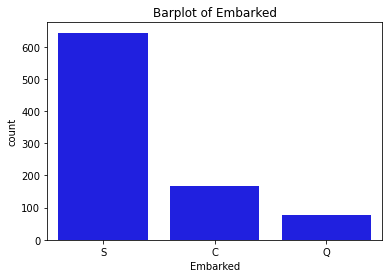

In [66]:
sns.countplot(df.Embarked, color = 'blue')
plt.title('Barplot of Embarked')

In [67]:
ct_Embarked = pd.crosstab(df.Survived, df.Embarked)
chi2_contingency(ct_Embarked, correction = False)

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  47.5511811, 397.7007874],
        [ 64.2519685,  29.4488189, 246.2992126]]))

In [68]:
d=pd.get_dummies(df.Embarked,drop_first=True)

In [69]:
df=pd.concat([df,d],axis=1)

In [70]:
df.drop('Embarked',axis=1,inplace=True)

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1.0,0,7.2500,0,1
1,1,1,0,38.0,1.0,0,65.6344,0,0
2,1,3,0,26.0,0.0,0,7.9250,0,1
3,1,1,0,35.0,1.0,0,53.1000,0,1
4,0,3,1,35.0,0.0,0,8.0500,0,1


In [72]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn. ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score,r2_score,accuracy_score

In [77]:
# X and y
x = df.loc[:, df.columns != 'Survived']
y = df.loc[:, df.columns == 'Survived']

In [78]:
y.value_counts()

Survived
0           549
1           342
dtype: int64

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Random Forest

In [80]:
from sklearn import metrics

In [81]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

C:\Users\hp\AppData\Local\Temp\ipykernel_7436\2148472383.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier()

In [82]:
params={
    'n_estimators':[100,200,300],
    'max_features':['sqrt',0.25]
}

In [83]:
gd=GridSearchCV(rf,params)

In [84]:
gd.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'n_estimators': [100, 200, 300]})

In [85]:
fr=gd.best_estimator_

In [86]:
fr

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [87]:
rf=RandomForestClassifier(n_estimators=200)

In [88]:
rf.fit(xtrain,ytrain)

C:\Users\hp\AppData\Local\Temp\ipykernel_7436\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=200)

In [89]:
y_pred = rf.predict(xtest)

In [90]:
rf.score(xtest,ytest)

0.8379888268156425

In [91]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[93 15]
 [14 57]]


In [92]:
accuracy_score(ytest,y_pred)

0.8379888268156425

In [93]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       108
           1       0.79      0.80      0.80        71

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [94]:
#ROC
y_pred_prob = rf.predict_proba(xtest)
fpr, tpr, thresholds =roc_curve(ytest, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc) 

0.9062989045383412


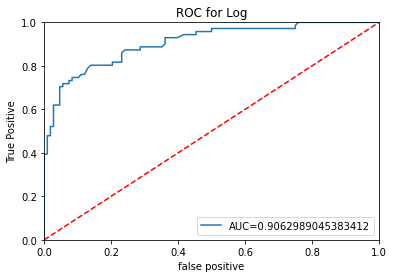

In [95]:
plt.title('ROC for Log')
plt.xlabel('false positive')
plt.ylabel('True Positive')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [97]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the candidate values of k
for k in k_values:
    # Create a KNN regressor with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate the cross-validation score for the current value of k
    scores = cross_val_score(knn, x, y)

    # Append the mean of the cross-validation scores to the list of scores
    cv_scores.append(np.mean(scores))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [100]:
# Find the index of the best value of k based on the cross-validation scores
best_index = np.argmax(cv_scores)

In [101]:
# Print the best value of k
print("Best value of k:", k_values[best_index])

Best value of k: 3


# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred=model.predict(xtest)

In [106]:
accuracy_score(ytest,y_pred)

0.8547486033519553

In [107]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[99  9]
 [17 54]]


In [108]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       108
           1       0.86      0.76      0.81        71

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [110]:
para={'max_depth':[10,20,30]}

In [111]:
gd=GridSearchCV(dt,para)

In [112]:
gd.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30]})

In [113]:
gd.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [114]:
dt = DecisionTreeClassifier(max_depth=20)

In [115]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=20)

In [116]:
y_pred = dt.predict(xtest)

In [117]:
accuracy_score(ytest,y_pred)

0.7877094972067039

In [118]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[90 18]
 [20 51]]


In [119]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       108
           1       0.74      0.72      0.73        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

